<a href="https://colab.research.google.com/github/AbhiDhariwal/Machine-Learning/blob/master/CRNN_cropped_text_image_to_text_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib
matplotlib.use("Agg"
)
%matplotlib inline
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import keras
from sklearn.model_selection import KFold

import numpy as np
import PIL
from PIL import Image
from matplotlib.pyplot import imshow
import pandas as pd
from glob import glob
from tqdm import tqdm
from joblib import Parallel, delayed
import pickle
import cv2
from google.colab.patches import cv2_imshow
from imutils.contours import sort_contours
import imutils

import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout,Concatenate
from keras.optimizers import Adam


In [ ]:
# cd /content/drive/My Drive/ocr_dataset/

In [ ]:
# cp rethink_ux_text.zip /content/


In [ ]:
cd /content/


/content


In [ ]:
# %%capture
# !unzip rethink_ux_text.zip

In [ ]:



def savePaddedImg(img):
    #create empty matrix
    vis = 255-np.zeros((45, 280), np.uint8)
    try:
        h1,w1 = img.shape
    except:
        h1,w1 = 0,0
    #combine  image over blank img
    vis[:h1, :w1] = img
    return vis/255
    

In [ ]:
def savePaddedImg1(img):
    #create empty matrix
    vis = 255-np.zeros((45, 280), np.uint8)
    try:
        h1,w1 = img.shape
    except:
        h1,w1 = 0,0
    #combine  image over blank img
    vis[:h1, :w1] = img
    return vis
    

In [ ]:
def load_rethink_image(img):
    tup = img.shape
    yy = tup[0]
    xx = tup[1]
    
    # print(tup)
    ## reconfiguring image to remove unneccessary item
    if xx == 388:
        # print("--")
        if yy<=27:
            img = img[:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[:,-311:])
        elif yy>27 and yy<=30:
            img = img[:-1,-320:-40]
           
            # cv2.imwrite(processed_path+"/" + img_name,img[:yy-2,-312:])
        elif yy>31 and yy<=35:
            img= img[:30,-320:-40]
            # cv2_imshow(img)
            # cv2.imwrite(processed_path+"/" + img_name,img[:29,-312:])
        elif yy==36:
            img = img[8:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[10:,-312:])
        elif yy==31:
            img = img[:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[:-2,-312:])
        #above 60y crop and 30 at beign
    elif xx>=250 and xx<286: 
        # print("<>")
        if yy == 31:
            img= img[2:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[3:-1,:])
        elif yy>=32 and yy<=37:
            img = img[-35:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
        elif yy == 38:
            img = img[33:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[33:,:])
        elif yy>=39 and yy<50:
            img = img[-30:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-28:,:])
        elif yy == 50:
            img = img[-30:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-26:,:])
        elif yy >= 51 and yy<=59:
            img = img[-26:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-26:,:])
        elif yy>=60:
            img = img[-36:65,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
    elif xx == 324:
        # print("{}")
        if yy==44:
            img = img[:,:-50]
            # cv2.imwrite(processed_path+"/" + img_name,img[5:-5,:])
        else:
            img = img[:,:-50]
    # print(img.shape)
    return img

   



In [ ]:
def load_rethink_image(img):
    tup = img.shape
    yy = tup[0]
    xx = tup[1]
    
    # print(tup)
    ## reconfiguring image to remove unneccessary item
    if xx == 388:
        # print("--")
        if yy<=27:
            img = img[:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[:,-311:])
        elif yy>27 and yy<=30:
            img = img[:-1,-320:-40]
           
            # cv2.imwrite(processed_path+"/" + img_name,img[:yy-2,-312:])
        elif yy>31 and yy<=35:
            img= img[:31,-320:-40]
            # cv2_imshow(img)
            # cv2.imwrite(processed_path+"/" + img_name,img[:29,-312:])
        elif yy==36:
            img = img[8:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[10:,-312:])
        elif yy==31:
            img = img[:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[:-2,-312:])
        #above 60y crop and 30 at beign
    elif xx>=250 and xx<286: 
        # print("<>")
        if yy == 31:
            img= img[:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[3:-1,:])
        elif yy>=32 and yy<=34:
            img = img[2:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
        elif yy>=35 and yy<=37:
            img = img[-35:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
        elif yy == 38:
            img = img[30:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[33:,:])
        elif yy>=39 and yy<50:
            img = img[-30:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-28:,:])
        elif yy == 50:
            img = img[-30:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-26:,:])
        elif yy >= 51 and yy<=59:
            img = img[-30:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-26:,:])
        elif yy>=60:
            img = img[-38:70,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
    elif xx == 324:
        # print("{}")
        if yy==44:
            img = img[:,:-50]
            # cv2.imwrite(processed_path+"/" + img_name,img[5:-5,:])
        else:
            img = img[:,:-50]
    # print(img.shape)
    return img

   



In [ ]:
def load_rethink_image(img):
    tup = img.shape
    yy = tup[0]
    xx = tup[1]
    
    # print(tup)
    ## reconfiguring image to remove unneccessary item
    if xx == 388:
        # print("--")
        if yy<=27:
            img = img[:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[:,-311:])
        elif yy>27 and yy<=30:
            img = img[:-1,-320:-40]
           
            # cv2.imwrite(processed_path+"/" + img_name,img[:yy-2,-312:])
        elif yy>31 and yy<=35:
            img= img[:31,-320:-40]
            # cv2_imshow(img)
            # cv2.imwrite(processed_path+"/" + img_name,img[:29,-312:])
        elif yy==36:
            img = img[8:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[10:,-312:])
        elif yy==31:
            img = img[:,-320:-40]
            # cv2.imwrite(processed_path+"/" + img_name,img[:-2,-312:])
        #above 60y crop and 30 at beign
    elif xx>=250 and xx<286: 
        # print("<>")
        if yy == 31:
            img= img[:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[3:-1,:])
        elif yy>=32 and yy<=34:
            img = img[:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
        elif yy>=35 and yy<=37:
            img = img[:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
        elif yy == 38:
            img = img[:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[33:,:])
        elif yy>=39 and yy<50:
            img = img[-45:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-28:,:])
        elif yy == 50:
            img = img[10:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-26:,:])
        elif yy >= 51 and yy<=59:
            img = img[-45:,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-26:,:])
        elif yy>=60:
            img = img[25:70,:280]
            # cv2.imwrite(processed_path+"/" + img_name,img[-33:60,:])
    elif xx == 324:
        # print("{}")
        if yy==44:
            img = img[:,:-50]
            # cv2.imwrite(processed_path+"/" + img_name,img[5:-5,:])
        else:
            img = img[:,:-50]
    # print(img.shape)
    return img

   



In [ ]:

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    f.close()

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        val = pickle.load(f)
    f.close()
    return val

In [ ]:

alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 25 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 35 # max length of predicted labels


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [ ]:
def load_train_test_set(train_,test_):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    folder = "TRAIN/"

    for i in tqdm(train_):
        train_x.append(savePaddedImg(load_rethink_image( cv2.imread(folder+imglist[i], cv2.IMREAD_GRAYSCALE))))
        train_y.append(values[i])

    for k in tqdm(test_):
        test_x.append(savePaddedImg(load_rethink_image( cv2.imread(folder+imglist[k], cv2.IMREAD_GRAYSCALE))))
        test_y.append(values[k])

    return train_x,train_y,test_x,test_y

In [ ]:

folder = "TRAIN/"

### load train set


In [ ]:
df = pd.read_csv("TRAIN.csv")
df.head()


,FILENAME,VALUES
0,000000.jpg,KESSELER
1,000001.jpg,LUCAS
2,000002.jpg,ELYN
3,000003.jpg,ALONZO
4,000004.jpg,NINO


In [ ]:
isna = df.VALUES.isna()

In [ ]:
for ind in range(len(isna)):
    if isna[ind] == True:
        df.iloc[ind].VALUES = " "
        print(ind)


39
415
3551
3555
3730
4226
4576
6970
7477
8538
8814
8911
9382
9449
9613
10105
11012
11728
11813
12105
14236
14606
14860
15530
16266
16625
16769
16991
17490
17682
17707
18196
18198
18511
18562
18889
19027
19551
19942
20070
20262
20403
21062
21223
21289
21652
24541
24920
25226
25710
26021
26169
26410
26710
26748
27586
29604
29750
30506
31776
32402
32568
32644
32740
32861
33074
34050
34135
34627
35424
36637
37227
38362
39147
39193
39638
39998
40506
40796
40826
40869
40905
41146
41550
41890
42623
43406
43889
46801
46953
47096
47441
47529
47726
47858
48357
49333
51943
53158
53253
53907
54118
54161
54859
56666
57584
57953
59938
64438
64642
65202
65464
66283
66378
66446
66474
67508
67652
69262
69588
70872
71838
73378
74007
74461
75927
76441
76530
76775
77139
79638
80290
82202
82532
82628
84988
85303
85748
86357
86462
86476
86600
87032
87987
88211
90000
91075
91262
91350
91426
92542
93354
94813
94897
94927
95116
95133
95739
95816
96245
96560
97251
97510
97887
99008
99141
99576
99693
100892
100

In [ ]:
df.iloc[39]


FILENAME    000039.jpg
VALUES                
Name: 39, dtype: object

In [ ]:
print(len(df))
df = df.dropna()

values = df.VALUES
imglist = df.FILENAME
print(len(df))
imglist[:5]


165480
165480


0    000000.jpg
1    000001.jpg
2    000002.jpg
3    000003.jpg
4    000004.jpg
Name: FILENAME, dtype: object

In [ ]:
# df.reset_index(inplace = True)

In [ ]:
len(imglist)

165480

In [ ]:
import pickle


In [ ]:
max_str_len = 25

In [ ]:
import gc 
gc.collect()

24

In [ ]:

input_data = Input(shape=(45, 280, 1), name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv4', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 1), name='max4')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((35, 256)), name='reshape')(inner)
inner = Dense(70, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(64, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(64, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT

inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 45, 280, 1)]      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 45, 280, 32)       320       
_________________________________________________________________
batch_normalization (BatchNo (None, 45, 280, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 45, 280, 32)       0         
_________________________________________________________________
max1 (MaxPooling2D)          (None, 22, 140, 32)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 22, 140, 64)       18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 140, 64)      

In [ ]:

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, :, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [ ]:

labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='int8')
input_length = Input(name='input_length', shape=[1], dtype='int8')
label_length = Input(name='label_length', shape=[1], dtype='int8')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [ ]:

# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0001))


In [ ]:
import gc 
gc.collect()

countxx = 0
indexes = list(range(len(df)))
kf = KFold(n_splits=3)
# as dataset is large we can load in set of 50k img
for train_index, test_index in kf.split(indexes):
    kf1 = KFold(n_splits=3)
    # then we further split into 2:1 ratio so we do not overfit 
    for train_, test_ in kf1.split(test_index):
        train_y = np.array([])
        valid_y = np.array([])
        tx, ty,tesx,tesy = load_train_test_set(train_,test_)
        countxx += 1
        # save_obj(imgset,"/content/drive/My Drive/ocr_dataset/ux_text_dataset_set" + str(countxx) )
        print(countxx,":- TRAIN:", len(train_), "TEST:", len(test_))
        
        tx = np.array(tx).reshape(-1, 45, 280, 1)
        tesx = np.array(tesx).reshape(-1, 45, 280, 1)
        train_size = len(ty)
        val_size = len(tesy)

        train_y = np.ones([train_size, max_str_len]) * -1
        train_label_len = np.zeros([train_size, 1])
        train_input_len = np.ones([train_size, 1]) * (num_of_timestamps)
        train_output = np.zeros([train_size])

        for i in range(train_size):
            string = ty[i].upper()
            train_label_len[i] = len(string)
            train_y[i, 0:len(string)]= label_to_num(string)

        valid_y = np.ones([val_size, max_str_len]) * -1
        valid_label_len = np.zeros([val_size, 1])
        valid_input_len = np.ones([val_size, 1]) * (num_of_timestamps)
        valid_output = np.zeros([val_size])

        for i in range(val_size):
            string = tesy[i].upper()
            valid_label_len[i] = len(string)
            valid_y[i, 0:len(string)]= label_to_num(string) 

        filepath = "/content/drive/My Drive/ocr_dataset/crnn_ocrtext_model8_updated_kfold" + str(countxx) + "_{val_loss:.3f}.h5"

        # del imgset

        MC = keras.callbacks.ModelCheckpoint(
            filepath,
            monitor="val_loss",
            verbose=1,
            save_best_only=True,
            mode="auto",
            save_freq="epoch",
        )

        model_final.fit(x=[tx, train_y, train_input_len, train_label_len], y=train_output, 
                        validation_data=([tesx, valid_y, valid_input_len, valid_label_len], valid_output),callbacks=[MC],
                        epochs=300, batch_size=128)
        
        # import gc 
        gc.collect()
        break

288/288 [==============================] - ETA: 0s - loss: 6.2568
Epoch 00006: val_loss improved from 6.07142 to 5.56634, saving model to /content/drive/My Drive/ocr_dataset/crnn_ocrtext_model8_updated_kfold1_5.566.h5
288/288 [==============================] - 163s 566ms/step - loss: 6.2568 - val_loss: 5.5663
Epoch 7/300
288/288 [==============================] - ETA: 0s - loss: 5.7087
Epoch 00007: val_loss improved from 5.56634 to 5.05535, saving model to /content/drive/My Drive/ocr_dataset/crnn_ocrtext_model8_updated_kfold1_5.055.h5
288/288 [==============================] - 163s 567ms/step - loss: 5.7087 - val_loss: 5.0554
Epoch 8/300
288/288 [==============================] - ETA: 0s - loss: 5.3025
Epoch 00008: val_loss improved from 5.05535 to 4.90282, saving model to /content/drive/My Drive/ocr_dataset/crnn_ocrtext_model8_updated_kfold1_4.903.h5
288/288 [==============================] - 163s 567ms/step - loss: 5.3025 - val_loss: 4.9028
Epoch 9/300
288/288 [======================

KeyboardInterrupt: ignored

In [ ]:

filepath = "/content/drive/My Drive/ocr_dataset/crnn_ocrtext_model7_updated_kfold" + str(countxx) + "_{val_loss:.3f}.h5"

# del imgset

MC = keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="auto",
    save_freq="epoch",
)

model_final.fit(x=[tx, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([tesx, valid_y, valid_input_len, valid_label_len], valid_output),callbacks=[MC],
                epochs=300, batch_size=128)


array([11., 20.,  2., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
filepath = "/content/crnn_ocrtext_model_updated_{val_loss:.2f}.h5"


MC = keras.callbacks.ModelCheckpoint(
    filepath,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="auto",
    save_freq="epoch",
)

model_final.fit(x=[imgs[:30000], train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([imgs[30000:35000], valid_y, valid_input_len, valid_label_len], valid_output),callbacks=[MC],
                epochs=200, batch_size=128)

In [ ]:
# !cp "/content/crnn_ocrtext_model_updated_1.90.h5" "/content/drive/My Drive/ocr_dataset/"

In [ ]:
ca = glob("*kfold*")
ca[:2]

['crnn_ocrtext_model_updated_kfold8_0.706.h5',
 'crnn_ocrtext_model_updated_kfold2_2.997.h5']

In [ ]:
for c in ca[:]:
    !cp {c} "/content/drive/My Drive/ocr_dataset/"

In [ ]:
!cp  "/content/drive/My Drive/ocr_dataset/crnn_ocrtext_model_updated_kfold4_1.480.h5" "/content/"

cp: cannot stat '/content/drive/My Drive/ocr_dataset/crnn_ocrtext_model_updated_kfold4_1.480.h5': No such file or directory


In [ ]:
model.load_weights("/content/crnn_ocrtext_model_updated_kfold5_1.132.h5")

In [ ]:

for i in range(len(train_y)):
    if sum(train_y[i])<-24:
        print(i)

In [ ]:

for i in range(len(valid_y)):
    if sum(valid_y[i])<-24:
        print(i)

357


In [ ]:
string = tesy[357]
valid_label_len[i] = len(string)
valid_y[i, 0:len(string)]= label_to_num(string)

In [ ]:
label_to_num("abc")

array([-1, -1, -1])

In [ ]:
valid_y[357]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
ty[357]

'JERINECK'

In [ ]:
preds = model.predict(tesx)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(len(preds)):
    prediction.append(num_to_label(decoded[i]))

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


In [ ]:
y_true = tesy
correct_char = 0
total_char = 0
correct = 0
symbol_ = 0
sym_ = 0

for i in range(len(preds)):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
    if " " in pr:
        symbol_ +=1
    if "'" in pr or "-" in pr:
        sym_ += 1
    if pr == tr :
        correct += 1 

In [ ]:

print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/val_size))

Correct characters predicted : 94.88%
Correct words predicted      : 87.79%


In [ ]:
sym_,symbol_

(21, 17)

In [ ]:
imgs[999].shape

(280, 45, 1)

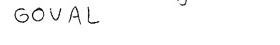

In [ ]:
cv2_imshow(imgs[5]*255)

In [ ]:
cv2_imshow(imgs[999])

In [ ]:
pr,tr,i

('MARIE-STELLA', 'MARIESTELLA', 999)

### check performance over 100-100 images

In [ ]:
correct_char = 0
total_char = 0
correct = 0
symbol_ = 0
sym_ = 0
for ran in range(0,len(preds),100):
    correct_char = 0
    total_char = 0
    correct = 0
    symbol_ = 0
    sym_ = 0
    for i in range(ran,min(len(preds),ran+100)):
        pr = prediction[i]
        tr = y_true[i]
        total_char += len(tr)
        
        for j in range(min(len(tr), len(pr))):
            if tr[j] == pr[j]:
                correct_char += 1
        # print("Actual:- ",tr,"    <--->    Predicted:- ",pr )
        if " " in pr:
            symbol_ +=1
        if "'" in pr or "-" in pr:
            sym_ += 1
        if pr == tr :
            correct += 1 
    print("range:-",ran,"-",ran+100, "correct:-",correct,"%","   char" ,correct_char*100/total_char,"%")

range:- 0 - 100 correct:- 80 %    char 93.24116743471582 %
range:- 100 - 200 correct:- 86 %    char 94.21613394216133 %
range:- 200 - 300 correct:- 93 %    char 96.92307692307692 %
range:- 300 - 400 correct:- 88 %    char 92.9676511954993 %
range:- 400 - 500 correct:- 90 %    char 96.46869983948636 %
range:- 500 - 600 correct:- 89 %    char 94.90445859872611 %
range:- 600 - 700 correct:- 90 %    char 95.84615384615384 %
range:- 700 - 800 correct:- 84 %    char 93.23899371069183 %
range:- 800 - 900 correct:- 89 %    char 95.49549549549549 %
range:- 900 - 1000 correct:- 83 %    char 94.5266272189349 %
range:- 1000 - 1100 correct:- 86 %    char 96.09609609609609 %
range:- 1100 - 1200 correct:- 91 %    char 97.06314243759178 %
range:- 1200 - 1300 correct:- 86 %    char 90.07751937984496 %
range:- 1300 - 1400 correct:- 86 %    char 92.06106870229007 %
range:- 1400 - 1500 correct:- 83 %    char 90.8675799086758 %
range:- 1500 - 1600 correct:- 88 %    char 95.46165884194053 %
range:- 1600 - 1

In [ ]:
for j in range(0,350,100):
    print(j)

0
100
200
300


In [ ]:

print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/100))

Correct characters predicted : 94.94%
Correct words predicted      : 85.00%


### pred on test set

In [ ]:
from glob import glob

test_path = glob("TEST/*")

In [ ]:
test_path.sort()
test_path[:3]

['TEST/000000.jpg', 'TEST/000001.jpg', 'TEST/000002.jpg']

In [ ]:

imgs    = [savePaddedImg(load_rethink_image( cv2.imread(q, cv2.IMREAD_GRAYSCALE))) for q in test_path ]


In [ ]:
test_path[:3]

['TEST/013123.jpg', 'TEST/000583.jpg', 'TEST/005374.jpg']

In [ ]:
imgs = np.array(imgs).reshape(-1, 45, 280, 1)
# valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)

In [ ]:
imgs[0].shape

(45, 280, 1)

In [ ]:

pred_val = model.predict(imgs)

In [ ]:
decoded = K.get_value(K.ctc_decode(pred_val, input_length=np.ones(pred_val.shape[0])*pred_val.shape[1], 
                                   greedy=True)[0][0])
prediction = []
for i in range(len(pred_val)):
    prediction.append(num_to_label(decoded[i]))


In [ ]:
prediction[:5]

['CASSANDRE', 'PETAUX', 'BONNIN', 'TANQUEREL', 'COZE']

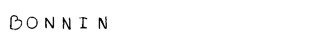

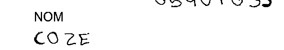

[None, None, None, None, None]

In [ ]:
[cv2_imshow( cv2.imread(q, cv2.IMREAD_GRAYSCALE)) for q in test_path[:5] ]

In [ ]:
test_path[:3]

['TEST/000000.jpg', 'TEST/000001.jpg', 'TEST/000002.jpg']

In [ ]:
pred_dict = {}
for index in range(len(test_path)):
    fname = test_path[index].split("/")[-1]
    pred_dict[fname] = prediction[index]

In [ ]:
pd.Series(pred_dict).to_csv("res_test1.csv")

In [ ]:
# identifying single character prediction which in generally do not appear in image
for i in range(len(prediction)):
    string = prediction[i]
    if len(string) <2:
        print(i," ",string)

463   M
2342   
2372   E
3497   V
4704   A
6605   P
6952   E
8050   E
8643   E
8953   E
9014   E
9828   M
10162   M
10163   M
11206   E
11580   M
12119   E
12899   E
14230   J
15163   A
15815   T
16160   T
16282   
16877   E
17457   E
18098   E
18737   U


In [ ]:
# identifying blank images
dt = pd.read_csv("TRAIN.csv")
# df.head()

dt[dt.VALUES.isna()]

,FILENAME,VALUES
39,000039.jpg,NaN
415,000415.jpg,NaN
3551,003551.jpg,NaN
3555,003555.jpg,NaN
3730,003730.jpg,NaN
...,...,...
161658,161658.jpg,NaN
161918,161918.jpg,NaN
162151,162151.jpg,NaN
164285,164285.jpg,NaN


### direct load and predict

In [ ]:
model.load_weights("/content/crnn_ocrtext_model_updated_kfold8_0.706.h5")

In [ ]:
from glob import glob

test_path = glob("TEST/*")

test_path.sort()
test_path[:3]


imgs    = [savePaddedImg(load_rethink_image( cv2.imread(q, cv2.IMREAD_GRAYSCALE))) for q in test_path ]

imgs = np.array(imgs).reshape(-1, 45, 280, 1)
pred_val = model.predict(imgs)
decoded = K.get_value(K.ctc_decode(pred_val, input_length=np.ones(pred_val.shape[0])*pred_val.shape[1], 
                                   greedy=True)[0][0])
prediction = []
for i in range(len(pred_val)):
    prediction.append(num_to_label(decoded[i]))


pred_dict = {}
for index in range(len(test_path)):
    fname = test_path[index].split("/")[-1]
    pred_dict[fname] = prediction[index]

pd.Series(pred_dict).to_csv("res_test0_0629.csv")

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
